## Book genre EDA

The following notebooks will explore the most popular genre and their sales
values using book sales data

##### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# cleaned book sales dataset
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
sales = pd.read_csv(f'{data_path}book_sales.csv', index_col=[0])
goodread = pd.read_csv(f'{data_path}book_goodread.csv', index_col=[0])

# First impression of the data
sales.head()

,genre,sold_by,daily_average_units_sold,publisher_name,publisher_type,average_rating,sale_price,total_reviews,price_range
0,genre fiction,HarperCollins Publishers,7000,Katherine Tegen Books,big five,4.57,4.88,9604,normal
1,genre fiction,HarperCollins Publishers,6250,HarperCollins e-books,big five,4.47,1.99,450,cheap
2,genre fiction,"Amazon Digital Services, Inc.",5500,(Small or Medium Publisher),small/medium,4.16,8.69,30,normal
3,fiction,Hachette Book Group,5500,"Little, Brown and Company",big five,3.84,7.50,3747,normal
4,genre fiction,Penguin Group (USA) LLC,4750,Dutton Children's,big five,4.75,7.99,9174,normal


In [3]:
# Total review and genre
df = sales.groupby('genre')[['total_reviews']]\
        .count().sort_values(by='total_reviews', ascending=False)
df

,total_reviews
genre,
nonfiction,14161
genre fiction,8903
children,2541
fiction,733
comics,568
foreign language,121


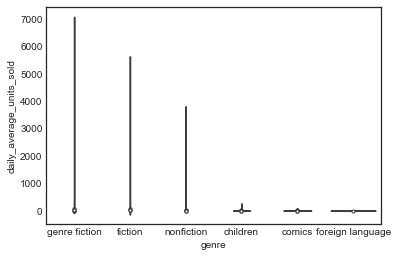

In [4]:
# Violin plot of units sold broken down by genre.
sns.violinplot(x='genre', y='daily_average_units_sold', data=sales)

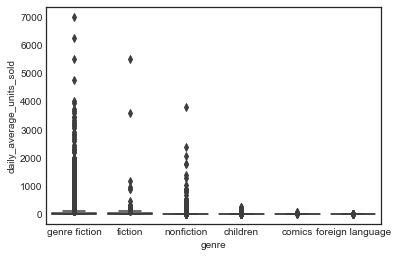

In [5]:
# Excluding Comics and foreign language because of their small volume. 
sns.boxplot(x='genre', y='daily_average_units_sold', data=sales)

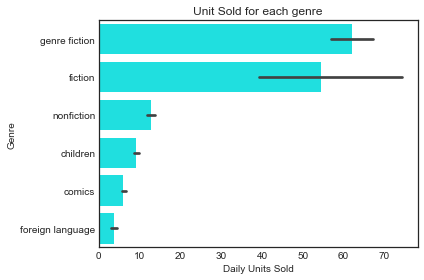

In [6]:
# Daily unit sold of books broken down by genre
sns.barplot(y='genre', x='daily_average_units_sold', data=sales, color='cyan')
plt.xlabel('Daily Units Sold')
plt.ylabel('Genre')
plt.title('Unit Sold for each genre')
plt.tight_layout()

plt.savefig('images/genre_unit_sold.png')

In [7]:
sales.groupby(['price_range', 'genre']).size()

price_range  genre           
cheap        children             687
             comics               155
             fiction              367
             foreign language      55
             genre fiction       3010
             nonfiction          3714
extra        fiction                3
             foreign language       2
             genre fiction         18
             nonfiction           529
high         children              36
             comics                57
             fiction               42
             foreign language       8
             genre fiction        332
             nonfiction          3404
normal       children            1818
             comics               356
             fiction              321
             foreign language      56
             genre fiction       5543
             nonfiction          6514
dtype: int64

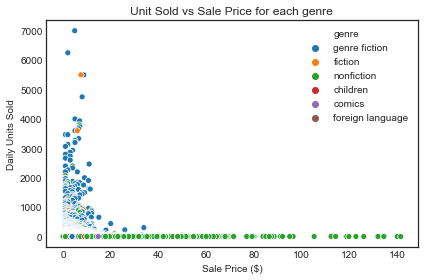

In [8]:
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales, 
                hue='genre')
plt.xlabel('Sale Price ($)')
plt.ylabel('Daily Units Sold')
plt.title('Unit Sold vs Sale Price for each genre')
plt.tight_layout()

plt.savefig('images/genre_unit_price.png')

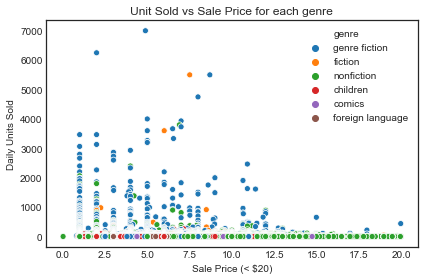

In [9]:
sns.scatterplot(x='sale_price', y='daily_average_units_sold', 
                data=sales[sales.sale_price < 20], hue='genre')
plt.xlabel('Sale Price (< $20)')
plt.ylabel('Daily Units Sold')
plt.title('Unit Sold vs Sale Price for each genre')
plt.tight_layout()

plt.savefig('images/genre_unit_price20.png')

In [36]:
book_machinehack = pd.read_excel(f'{data_path}/book_machinehack.xlsx')
book_machinehack.head()

num_reviews = book_machinehack.Ratings.str.replace('customer reviews','')
num_reviews = num_reviews.str.replace('customer review', '')
num_reviews = num_reviews.str.replace(',', '').str.strip()
num_reviews = num_reviews.astype('int')

book_machinehack.Ratings = num_reviews

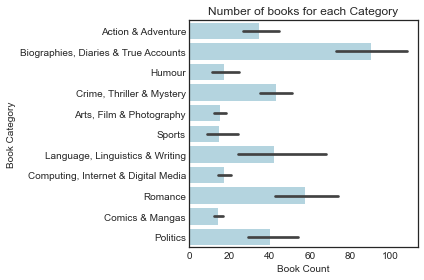

In [48]:
# Number of books in each category
sns.barplot(x='Ratings', y='BookCategory', data=book_machinehack,
            color='lightblue')
plt.xlabel('Book Count')
plt.ylabel('Book Category')
plt.title('Number of books for each Category')
plt.tight_layout()
plt.savefig('images/category_count.png')

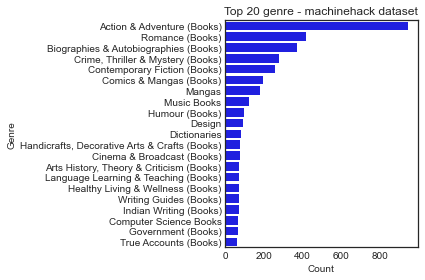

In [50]:
# Top 20 genre
top20_genre = book_machinehack.groupby('Genre').count().sort_values(by='Price', ascending=False)['Price']
top20_genre = top20_genre[:21]

# Get the bar
sns.barplot(y=top20_genre.index, x=top20_genre, color='blue')
plt.xlabel('Count')
plt.title('Top 20 genre - machinehack dataset')
plt.tight_layout()
plt.savefig('images/genre_count.png')

### How big/long should the book be?

Text(0.5, 1.0, 'Number of pages distribution of goodread books data')

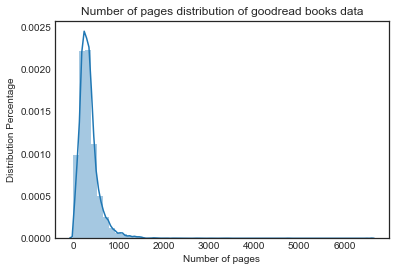

In [13]:
sns.distplot(goodread.num_pages)
plt.ylabel('Distribution Percentage')
plt.xlabel('Number of pages')
plt.title('Number of pages distribution of goodread books data')
